In [15]:
library(data.table)
library(dplyr)
library(forcats)
library(ggplot2)
library(cowplot)
library(ggsci)

In [16]:
options(repr.plot.width=6, repr.plot.height=6)

In [26]:
fname = "../data/benchmark/2comb/res1-1.txt"

Read 17920000 rows and 10 (of 10) columns from 0.558 GB file in 00:00:17


In [27]:
d <- fread(fname) %>%
    mutate(
        sigtype = as.factor(sigtype),
        sig1 = as.factor(sig1),
        sig2 = as.factor(sig2),
        ratio = as.factor(ratio),
        noise = as.factor(noise),
        nmut = as.factor(nmut),
        method = factor(method, levels=c('original', 'aicc', 'aiccz', 'mle', 'ds')),
        signature = as.factor(signature),
        contribution = value,
    ) %>%
    filter(
        sigtype == 30,
        method %in% c('original', 'aicc', 'aiccz', 'mle', 'ds')
    ) %>%
    mutate(
        method = fct_recode(method,
           'target' = "original",
            "AICc" = "aicc",
            "dSigs" = "ds",
           "AICcZ" = "aiccz",
           "MLE" = "mle"
          )
    )
head(d)

sigtype,sig1,sig2,ratio,noise,nmut,replica,method,signature,value,contribution
30,10,1,5,10,500,0,target,1,0.5,0.5
30,10,1,5,10,500,0,target,2,0.0,0.0
30,10,1,5,10,500,0,target,3,0.0,0.0
30,10,1,5,10,500,0,target,4,0.0,0.0
30,10,1,5,10,500,0,target,5,0.0,0.0
30,10,1,5,10,500,0,target,6,0.0,0.0


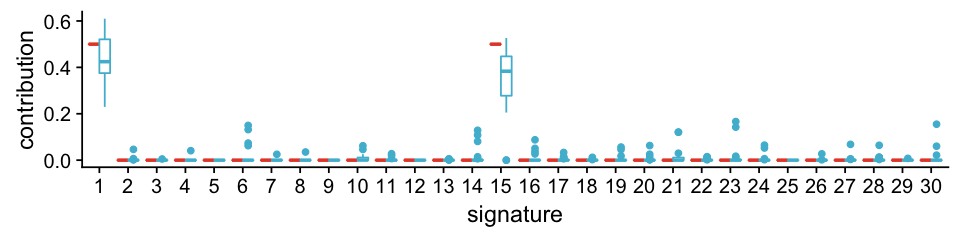

In [45]:
#####  Figure on benchmark
options(repr.plot.width=8, repr.plot.height=2)
ggplot(d %>% 
       filter(
           sigtype==30 & sig1==1 & sig2==15 &
           noise==10 & ratio==5 &
          method %in% c('AICcZ', 'target')
       )) +
geom_boxplot(aes(x=signature, y=contribution, color=method), show.legend=F) +
scale_color_npg()
# facet_wrap(~as.factor(sig2), nrow=1)

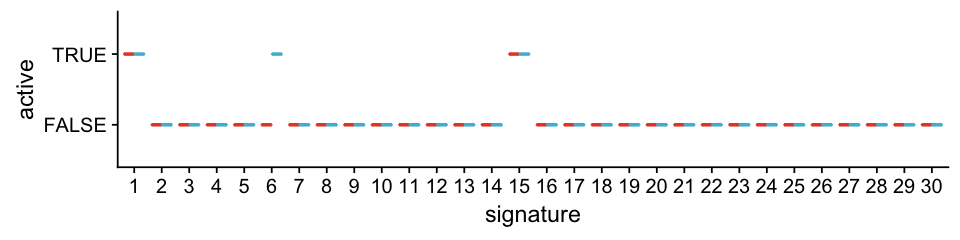

In [43]:
options(repr.plot.width=8, repr.plot.height=2)
ggplot(d %>% 
       filter(
           sigtype==30 & sig1==1 & sig2==15 & noise==10 & ratio==5 & 
           method %in% c('AICcZ', 'target')) %>%
       group_by(method, signature) %>%
       summarise(
           contribution = mean(contribution)
       ) %>%
       mutate(active = contribution > 0.02)
      ) +
geom_boxplot(aes(x=signature, y=active, color=method), show.legend=F) +
scale_color_npg()

In [ ]:
options(repr.plot.width=8, repr.plot.height=2*1)
d2 = d %>% filter(sigtype == 30 & sig1==1 & sig2 == 20, ratio==5 & noise==10 & nmut==500 & method != 'mlez' & method != 'ds') %>%
                 mutate(signature=as.factor(signature))
ggplot(d2) + geom_boxplot(aes(x=signature, y=value, color=method), show.legend=F)

options(repr.plot.width=8, repr.plot.height=2*1)
d2 = d %>% filter(sigtype == 30 & sig1==1 & sig2 == 20 & ratio==5 & noise==10 & nmut==500 & method != 'mlez' & method != 'ds') %>%
                 mutate(signature=as.factor(signature),
                        value=value >0.1)
ggplot(d2) + geom_boxplot(aes(x=signature, y=value, color=method), show.legend=F)

In [ ]:
d2 = d %>% filter(sigtype==30 & sig1 == "1" & noise==10 & ratio==7 & nmut==500)
options(repr.plot.width=8, repr.plot.height=1.5*30)
ggplot(d2) + geom_boxplot(aes(x=as.factor(signature), y=value, color=method), show.legend=F) + facet_wrap(~as.factor(sig2), nrow=30)

In [ ]:
options(repr.plot.width=4, repr.plot.height=2)
d_signal_noise <- d %>% 
    filter(sigtype==30 & method=="mle" & noise==10 & ratio==7 & nmut==500) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.2, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))

#######################
d_signal_noise <- d %>% 
    filter(sigtype==30 & method=="mle" & noise==10 & ratio==5 & nmut==500) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.28, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))


#######################
d_signal_noise <- d %>% 
    filter(sigtype==30 & method=="mle" & noise==10 & ratio==7 & nmut==50) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.2, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))

#######################

d_signal_noise <- d %>% 
    filter(sigtype==30 & method=="mle" & noise==10 & ratio==5 & nmut==50) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.28, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))

############################################################################################

d_signal_noise <- d %>% 
    filter(sigtype==30 & method=="mle" & noise==20 & ratio==7 & nmut==500) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.2, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))

#######################
d_signal_noise <- d %>% 
    filter(sigtype==30 & method=="mle" & noise==20 & ratio==5 & nmut==500) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.28, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))


#######################
d_signal_noise <- d %>% 
    filter(sigtype==30 & method=="mle" & noise==20 & ratio==7 & nmut==50) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.2, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))

#######################

d_signal_noise <- d %>% 
    filter(sigtype==30 & method=="mle" & noise==20 & ratio==5 & nmut==50) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.28, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))



# options(repr.plot.width=3, repr.plot.height=3)
# ggplot(d_signal_noise %>% filter(signal_noise == 0)) +
# geom_density(aes(x=value, y=..scaled.., fill=as.factor(noise)))

In [ ]:
options(repr.plot.width=4, repr.plot.height=2)
d_signal_noise <- d %>% 
    filter(sigtype==30 & method=="mlez" & noise==10 & ratio==7 & nmut==500) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.2, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))

#######################
d_signal_noise <- d %>% 
    filter(sigtype==30 & method=="mlez" & noise==10 & ratio==5 & nmut==500) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.28, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))


#######################
d_signal_noise <- d %>% 
    filter(sigtype==30 & method=="mlez" & noise==10 & ratio==7 & nmut==50) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.2, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))

#######################

d_signal_noise <- d %>% 
    filter(sigtype==30 & method=="mlez" & noise==10 & ratio==5 & nmut==50) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.28, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))

############################################################################################

d_signal_noise <- d %>% 
    filter(sigtype==30 & method=="mlez" & noise==20 & ratio==7 & nmut==500) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.2, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))

#######################
d_signal_noise <- d %>% 
    filter(sigtype==30 & method=="mlez" & noise==20 & ratio==5 & nmut==500) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.28, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))


#######################
d_signal_noise <- d %>% 
    filter(sigtype==30 & method=="mlez" & noise==20 & ratio==7 & nmut==50) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.2, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))

#######################

d_signal_noise <- d %>% 
    filter(sigtype==30 & method=="mlez" & noise==20 & ratio==5 & nmut==50) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.28, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))



# options(repr.plot.width=3, repr.plot.height=3)
# ggplot(d_signal_noise %>% filter(signal_noise == 0)) +
# geom_density(aes(x=value, y=..scaled.., fill=as.factor(noise)))

In [ ]:
options(repr.plot.width=4, repr.plot.height=2)
d_signal_noise <- d %>% 
    filter(sigtype==30 & method=="ds" & noise==10 & ratio==7 & nmut==500) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.2, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))

#######################
d_signal_noise <- d %>% 
    filter(sigtype==30 & method=="ds" & noise==10 & ratio==5 & nmut==500) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.28, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))


#######################
d_signal_noise <- d %>% 
    filter(sigtype==30 & method=="ds" & noise==10 & ratio==7 & nmut==50) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.2, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))

#######################

d_signal_noise <- d %>% 
    filter(sigtype==30 & method=="ds" & noise==10 & ratio==5 & nmut==50) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.28, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))

############################################################################################

d_signal_noise <- d %>% 
    filter(sigtype==30 & method=="ds" & noise==20 & ratio==7 & nmut==500) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.2, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))

#######################
d_signal_noise <- d %>% 
    filter(sigtype==30 & method=="ds" & noise==20 & ratio==5 & nmut==500) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.28, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))


#######################
d_signal_noise <- d %>% 
    filter(sigtype==30 & method=="ds" & noise==20 & ratio==7 & nmut==50) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.2, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))

#######################

d_signal_noise <- d %>% 
    filter(sigtype==30 & method=="ds" & noise==20 & ratio==5 & nmut==50) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.28, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))



# options(repr.plot.width=3, repr.plot.height=3)
# ggplot(d_signal_noise %>% filter(signal_noise == 0)) +
# geom_density(aes(x=value, y=..scaled.., fill=as.factor(noise)))

In [ ]:
options(repr.plot.width=4, repr.plot.height=2)
d_signal_noise <- d %>% 
    filter(sigtype==10 & method=="mlez" & noise==10 & ratio==7 & nmut==500) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.2, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))

#######################
d_signal_noise <- d %>% 
    filter(sigtype==10 & method=="mlez" & noise==10 & ratio==5 & nmut==500) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.28, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))


#######################
d_signal_noise <- d %>% 
    filter(sigtype==10 & method=="mlez" & noise==10 & ratio==7 & nmut==50) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.2, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))

#######################

d_signal_noise <- d %>% 
    filter(sigtype==10 & method=="mlez" & noise==10 & ratio==5 & nmut==50) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.28, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))

############################################################################################

d_signal_noise <- d %>% 
    filter(sigtype==10 & method=="mlez" & noise==20 & ratio==7 & nmut==500) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.2, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))

#######################
d_signal_noise <- d %>% 
    filter(sigtype==10 & method=="mlez" & noise==20 & ratio==5 & nmut==500) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.28, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))


#######################
d_signal_noise <- d %>% 
    filter(sigtype==10 & method=="mlez" & noise==20 & ratio==7 & nmut==50) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.2, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))

#######################

d_signal_noise <- d %>% 
    filter(sigtype==10 & method=="mlez" & noise==20 & ratio==5 & nmut==50) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.28, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))



# options(repr.plot.width=3, repr.plot.height=3)
# ggplot(d_signal_noise %>% filter(signal_noise == 0)) +
# geom_density(aes(x=value, y=..scaled.., fill=as.factor(noise)))

In [ ]:
options(repr.plot.width=4, repr.plot.height=2)
d_signal_noise <- d %>% 
    filter(sigtype==5 & method=="mlez" & noise==10 & ratio==7 & nmut==500) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.1, 0, 1))
    )
ggplot(d_signal_noise) +
geom_histogram(aes(x=value, fill=signal_noise, y=..ndensity..), binwidth=0.01, show.legend=F) +
expand_limits(x = 1)
options(repr.plot.width=4, repr.plot.height=2)


#######################
d_signal_noise <- d %>% 
    filter(sigtype==5 & method=="mlez" & noise==10 & ratio==5 & nmut==500) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.28, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))


#######################
d_signal_noise <- d %>% 
    filter(sigtype==5 & method=="mlez" & noise==10 & ratio==7 & nmut==50) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.2, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))

#######################

d_signal_noise <- d %>% 
    filter(sigtype==5 & method=="mlez" & noise==10 & ratio==5 & nmut==50) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.28, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))

############################################################################################

d_signal_noise <- d %>% 
    filter(sigtype==5 & method=="mlez" & noise==20 & ratio==7 & nmut==500) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.2, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))

#######################
d_signal_noise <- d %>% 
    filter(sigtype==5 & method=="mlez" & noise==20 & ratio==5 & nmut==500) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.28, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))


#######################
d_signal_noise <- d %>% 
    filter(sigtype==5 & method=="mlez" & noise==20 & ratio==7 & nmut==50) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.2, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..scaled.., fill=signal_noise))

#######################

d_signal_noise <- d %>% 
    filter(sigtype==5 & method=="mlez" & noise==20 & ratio==5 & nmut==50) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.28, 0, 1))
    )
ggplot(d_signal_noise) +
geom_density(aes(x=value, y=..density.., fill=signal_noise))



# options(repr.plot.width=3, repr.plot.height=3)
# ggplot(d_signal_noise %>% filter(signal_noise == 0)) +
# geom_density(aes(x=value, y=..scaled.., fill=as.factor(noise)))

In [ ]:
options(repr.plot.width=3, repr.plot.height=1.3)
d_signal_noise <- d %>% 
    filter(sigtype==5 & method=="mlez" & noise==10 & ratio==7 & nmut==500) %>%
    mutate(
        signal_noise =  as.factor(ifelse(value < 0.1, 0, 1))
    )
ggplot(d_signal_noise) +
geom_histogram(aes(x=value, fill=signal_noise, y=..ndensity..), binwidth=0.01, show.legend=F) +
expand_limits(x = 1)
options(repr.plot.width=4, repr.plot.height=2)



In [ ]:
# + scale_color_npg()
# + scale_fill_npg()

In [ ]:
library(tidyr)

In [ ]:
d2 = d %>% filter(sigtype==10 & sig1 == "1" & noise==10 & ratio==7 & nmut==500)
options(repr.plot.width=8, repr.plot.height=1.5*10)
ggplot(d2) + geom_boxplot(aes(x=as.factor(signature), y=value, color=method), show.legend=F) + facet_wrap(~as.factor(sig2), nrow=10)

In [ ]:
d2 = d %>% filter(sigtype==5 & sig1 == "1" & noise==10 & ratio==7 & nmut==500)
options(repr.plot.width=8, repr.plot.height=1.5*5)
ggplot(d2) + geom_boxplot(aes(x=as.factor(signature), y=value, color=method), show.legend=F) + facet_wrap(~as.factor(sig2), nrow=5)

In [ ]:
s0 = d %>% filter(sig2 == signature) %>%
    group_by(sig1, sig2, signature, method)    %>% 
    summarise(
        n = n(),
        mvalue = mean(tvalue, na.rm = TRUE)
    )

s = s0 %>%
    spread(method, mvalue)

In [ ]:
s2 = s %>% mutate(ds = original - ds, mle=original-mle) %>%
    select(-original)

options(repr.plot.width=4, repr.plot.height=2)
plot_grid(ggplot(s2) + geom_histogram(aes(mle)) + theme(axis.text.x = element_text(angle = 90, hjust = 1)),
          ggplot(s2) + geom_histogram(aes(ds)) + theme(axis.text.x = element_text(angle = 90, hjust = 1)),
          labels = c("A", "B"), align = "h")

options(repr.plot.width=2, repr.plot.height=2)
ggplot(s0 %>% filter(method != "original")) + geom_boxplot(aes(y=mvalue, x=method, fill=method), show.legend=F)

In [ ]:
options(repr.plot.width=4, repr.plot.height=1.8)
plot_grid(ggplot(s2) + geom_point(aes(ds, mle)),
          ggplot(s) + geom_point(aes(ds, mle)),
          labels = c("A", "B"), align = "h")